# Import Neccessary Librabies

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)


from sklearn import preprocessing
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("logs_dataset.csv")

In [3]:
df

,@timestamp,_id,ip_address
0,"July 8th 2019, 14:43:03.000",XswJ0msBoTGddM7vxMDB,10.1.1.285
1,"July 8th 2019, 14:43:01.000",dKQJ0msB7mP0GwVzvJjz,10.1.2.389
2,"July 8th 2019, 14:42:59.000",CcwJ0msBoTGddM7vtb8y,10.1.1.415
3,"July 8th 2019, 14:42:57.000",bKQJ0msB7mP0GwVzrZdT,10.1.1.79
4,"July 8th 2019, 14:42:55.000",L6QJ0msB7mP0GwVzpZeI,10.1.1.60
...,...,...,...
721542,"June 9th 2019, 00:00:25.000",dkWJOWsBoTGddM7vRUOR,10.1.2.66
721543,"June 9th 2019, 00:00:19.000",TBuJOWsB7mP0GwVzLmol,10.1.1.249
721544,"June 9th 2019, 00:00:15.000",vUWJOWsBoTGddM7vHkGD,10.1.1.200
721545,"June 9th 2019, 00:00:09.000",aUWJOWsBoTGddM7vB0AR,10.1.2.432


# Feature Extraction

In [6]:
import re


df['@timestamp'] = df['@timestamp'].apply(lambda x: re.sub(r'(\d+)(st|nd|rd|th)', r'\1', x))

# Now convert to datetime
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

This changes the timestamp from original to modified form

In [7]:
df.sort_values(['ip_address', '@timestamp'], inplace=True)

This sorts the dataset wrt to ip address and timestamp

In [8]:
df['shift_time'] = df.groupby(['ip_address'])['@timestamp'].shift(1)

It creates shift_time column one shiftdown for timestamp coumn

In [9]:
df['time_diff'] = (df['@timestamp'] -df['shift_time']).dt.seconds//60

Finding the time differnce between timestamp and shift time

In [10]:
df['date'] = df['@timestamp'].dt.date

Extracting the date from timestamp and creating seperate column

In [11]:
df['weekday'] = df['@timestamp'].dt.weekday

Extracting the no of weekdays present in timestamp

In [12]:
df['hour'] = df['@timestamp'].dt.hour

Finding the no.of hours present in timestamp column

In [13]:
df['is_weekend'] = ((df['weekday']==5 |(df['weekday']==6)).astype(int))

Finding how many weekend are present in timestamp

In [14]:
df['hour_bucket'] = df['hour']//4

In [15]:
df

,@timestamp,_id,ip_address,shift_time,time_diff,date,weekday,hour,is_weekend,hour_bucket
721473,2019-06-09 00:06:09,DBuOOWsB7mP0GwVzhZ9U,10.1.1.1,NaT,NaN,2019-06-09,6,0,0,0
720483,2019-06-09 01:28:39,bB7aOWsB7mP0GwVzDY5G,10.1.1.1,2019-06-09 00:06:09,82.0,2019-06-09,6,1,0,0
719233,2019-06-09 03:12:49,R0w5OmsBoTGddM7vayZT,10.1.1.1,2019-06-09 01:28:39,104.0,2019-06-09,6,3,0,0
719222,2019-06-09 03:13:45,U0w6OmsBoTGddM7vRi8R,10.1.1.1,2019-06-09 03:12:49,0.0,2019-06-09,6,3,0,0
718875,2019-06-09 03:42:39,z01UOmsBoTGddM7vuzyC,10.1.1.1,2019-06-09 03:13:45,28.0,2019-06-09,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...
3225,2019-07-08 11:49:00,3cBq0WsBoTGddM7va5TJ,10.1.2.99,2019-07-08 11:47:15,1.0,2019-07-08,0,11,0,2
2422,2019-07-08 12:22:29,QMKJ0WsBoTGddM7vE9N1,10.1.2.99,2019-07-08 11:49:00,33.0,2019-07-08,0,12,0,3
1704,2019-07-08 12:52:25,9pyk0WsB7mP0GwVze7sV,10.1.2.99,2019-07-08 12:22:29,29.0,2019-07-08,0,12,0,3
1138,2019-07-08 13:15:59,B8a60WsBoTGddM7vDnqQ,10.1.2.99,2019-07-08 12:52:25,23.0,2019-07-08,0,13,0,3


In [16]:
ip_addr ='ip_address'

In [17]:
ip_counts = df.groupby(ip_addr)['@timestamp'].count().reset_index()

Counting how many times the user in logging into the computer wrt to ip address

In [18]:
ip_counts

,ip_address,@timestamp
0,10.1.1.1,1446
1,10.1.1.100,2860
2,10.1.1.101,1465
3,10.1.1.106,1408
4,10.1.1.109,1459
...,...,...
381,10.1.2.86,4307
382,10.1.2.89,2826
383,10.1.2.90,2904
384,10.1.2.95,2868


In [19]:
ip_counts = ip_counts.rename(columns={'@timestamp':'total_count'})

In [20]:
daily_counts = df.groupby([ip_addr,'date'])['@timestamp'].count().reset_index()

In [21]:
daily_counts

,ip_address,date,@timestamp
0,10.1.1.1,2019-06-09,36
1,10.1.1.1,2019-06-10,37
2,10.1.1.1,2019-06-11,70
3,10.1.1.1,2019-06-12,38
4,10.1.1.1,2019-06-13,32
...,...,...,...
11575,10.1.2.99,2019-07-04,79
11576,10.1.2.99,2019-07-05,61
11577,10.1.2.99,2019-07-06,89
11578,10.1.2.99,2019-07-07,47


In [22]:
daily_counts = daily_counts.rename(columns={'@timestamp':'daily_counts'})

In [23]:
daily_counts_avg = daily_counts.groupby(ip_addr).daily_counts.median().reset_index()

Calculating the median of the counts for all the date having the same ip address

In [24]:
daily_counts_avg.head(5)

,ip_address,daily_counts
0,10.1.1.1,40.0
1,10.1.1.100,78.0
2,10.1.1.101,40.0
3,10.1.1.106,35.5
4,10.1.1.109,42.5


In [25]:
weekend_counts = df.groupby([ip_addr, 'is_weekend'])['@timestamp'].count().reset_index()

In [26]:
weekend_counts

,ip_address,is_weekend,@timestamp
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260
...,...,...,...
767,10.1.2.90,1,395
768,10.1.2.95,0,2478
769,10.1.2.95,1,390
770,10.1.2.99,0,1198


In [27]:
weekend_counts = weekend_counts.rename(columns={'@timestamp':'weekend_counts'})

In [28]:
weekend_counts.head()

,ip_address,is_weekend,weekend_counts
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260


calucating no.of logins occured in the weekends and weekdays

In [29]:
weekend_counts_avg = weekend_counts.pivot_table(index=ip_addr, columns='is_weekend').reset_index([0])

In [30]:
weekend_counts_avg.head()

ip_address weekend_counts       
is_weekend                          0      1
0             10.1.1.1         1245.0  201.0
1           10.1.1.100         2463.0  397.0
2           10.1.1.101         1260.0  205.0
3           10.1.1.106         1190.0  218.0
4           10.1.1.109         1244.0  215.0

In [31]:
weekend_counts_avg.columns = weekend_counts_avg.columns.droplevel()

In [32]:
weekend_counts_avg

is_weekend,,0,1
0,10.1.1.1,1245.0,201.0
1,10.1.1.100,2463.0,397.0
2,10.1.1.101,1260.0,205.0
3,10.1.1.106,1190.0,218.0
4,10.1.1.109,1244.0,215.0
...,...,...,...
381,10.1.2.86,3699.0,608.0
382,10.1.2.89,2435.0,391.0
383,10.1.2.90,2509.0,395.0
384,10.1.2.95,2478.0,390.0


In [33]:
weekend_counts_avg.columns = [ip_addr, 'week_day', 'weekend']

In [34]:
weekend_counts_avg['is_weekend_ratio'] = weekend_counts_avg['week_day']/ weekend_counts_avg['weekend']

finding the ratio between weekday and weekend

In [35]:
weekend_counts_avg.head()

,ip_address,week_day,weekend,is_weekend_ratio
0,10.1.1.1,1245.0,201.0,6.194030
1,10.1.1.100,2463.0,397.0,6.204030
2,10.1.1.101,1260.0,205.0,6.146341
3,10.1.1.106,1190.0,218.0,5.458716
4,10.1.1.109,1244.0,215.0,5.786047


In [36]:
lean_weekend_counts_avg = weekend_counts_avg[[ip_addr, 'is_weekend_ratio']]

In [37]:
lean_weekend_counts_avg.head()

,ip_address,is_weekend_ratio
0,10.1.1.1,6.194030
1,10.1.1.100,6.204030
2,10.1.1.101,6.146341
3,10.1.1.106,5.458716
4,10.1.1.109,5.786047


In [38]:
avg_time_data = df.groupby(ip_addr).agg({'time_diff':['mean','max']}).reset_index()

In [39]:
avg_time_data.head()

ip_address  time_diff       
                    mean    max
0    10.1.1.1  28.999308  362.0
1  10.1.1.100  14.427072  185.0
2  10.1.1.101  28.520492  211.0
3  10.1.1.106  29.771144  319.0
4  10.1.1.109  28.711934  278.0

In [40]:
avg_time_data.columns = avg_time_data.columns.droplevel()

In [41]:
avg_time_data.columns = [ip_addr, 'td_mean', 'td_max']

calulating the mean and max for time_diff column and labelling as td_mean and td_max

In [42]:
avg_time_data.head()

,ip_address,td_mean,td_max
0,10.1.1.1,28.999308,362.0
1,10.1.1.100,14.427072,185.0
2,10.1.1.101,28.520492,211.0
3,10.1.1.106,29.771144,319.0
4,10.1.1.109,28.711934,278.0


## Total Features Set

In [43]:
mer_1 = ip_counts.merge(daily_counts_avg, on=ip_addr, how='left')

In [44]:
mer_2 = mer_1.merge(lean_weekend_counts_avg, on=ip_addr, how='left')

In [45]:
final_dataset = mer_2.merge(avg_time_data, on=ip_addr, how='left')

In [46]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0


In [47]:
ip_map = final_dataset[ip_addr].to_dict()

In [48]:
RANDOM_STATE = 30

# KMeans

In [49]:
from sklearn.cluster import KMeans

In [50]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max'],
      dtype='object')

Displaying the columns present in the final_dataset

In [51]:
requi_feature_cols = ['total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']

In [52]:
new_data = final_dataset[requi_feature_cols]

In [53]:
min_max_scaler = preprocessing.MinMaxScaler()

In [54]:
data_scaled = min_max_scaler.fit_transform(new_data)
new_data = pd.DataFrame(data_scaled,columns=requi_feature_cols)

In [55]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

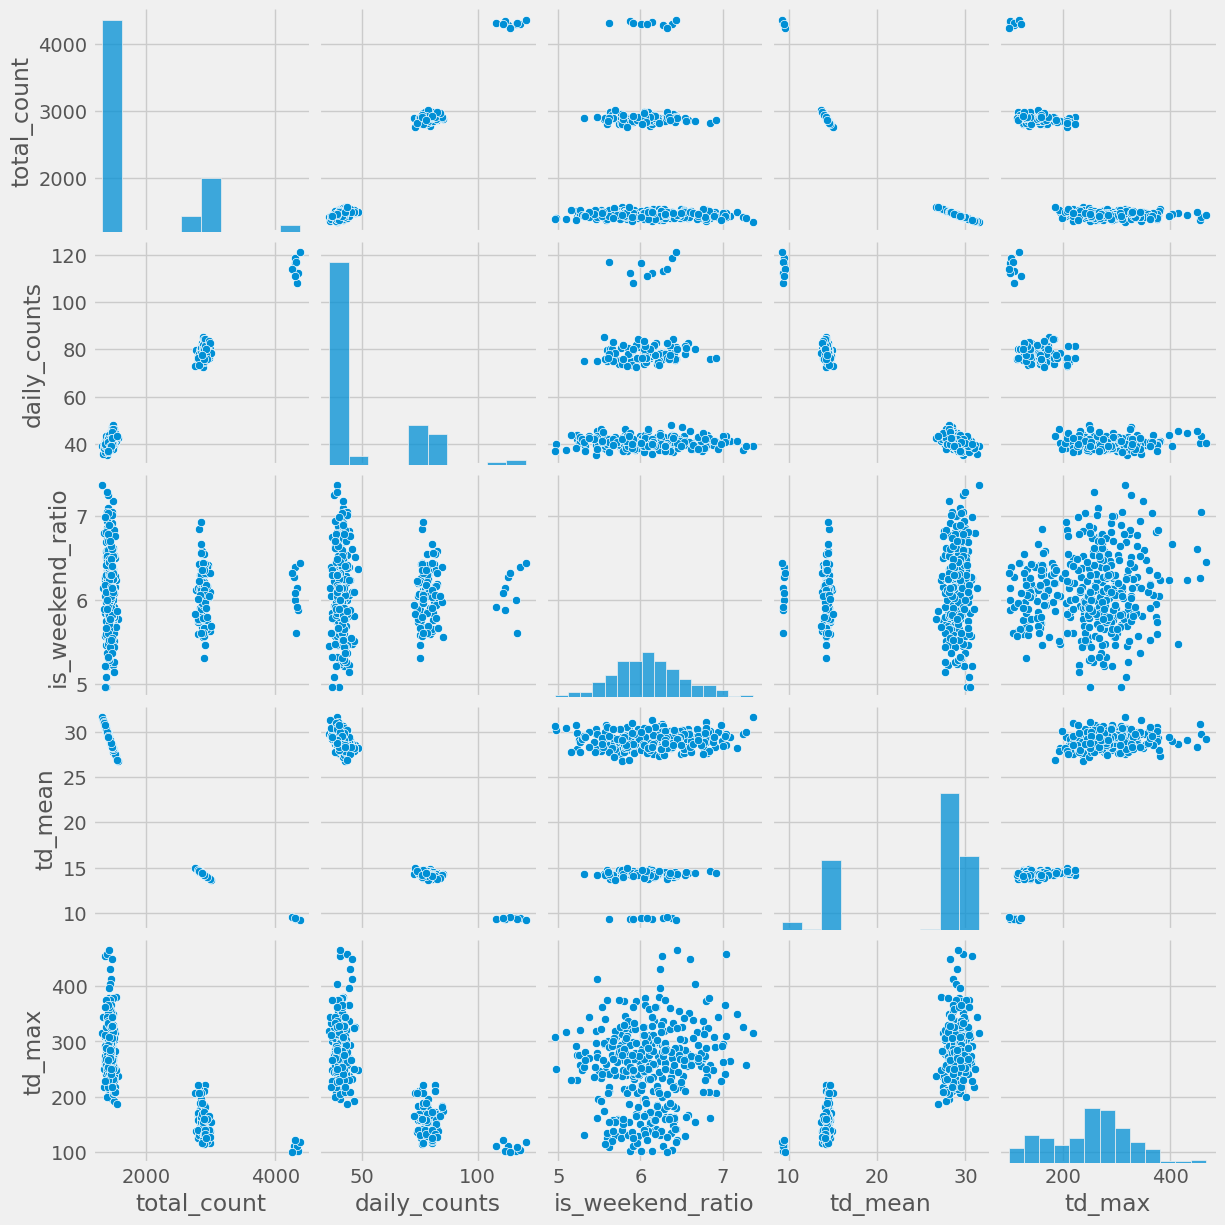

In [56]:
sns.pairplot(final_dataset[requi_feature_cols])

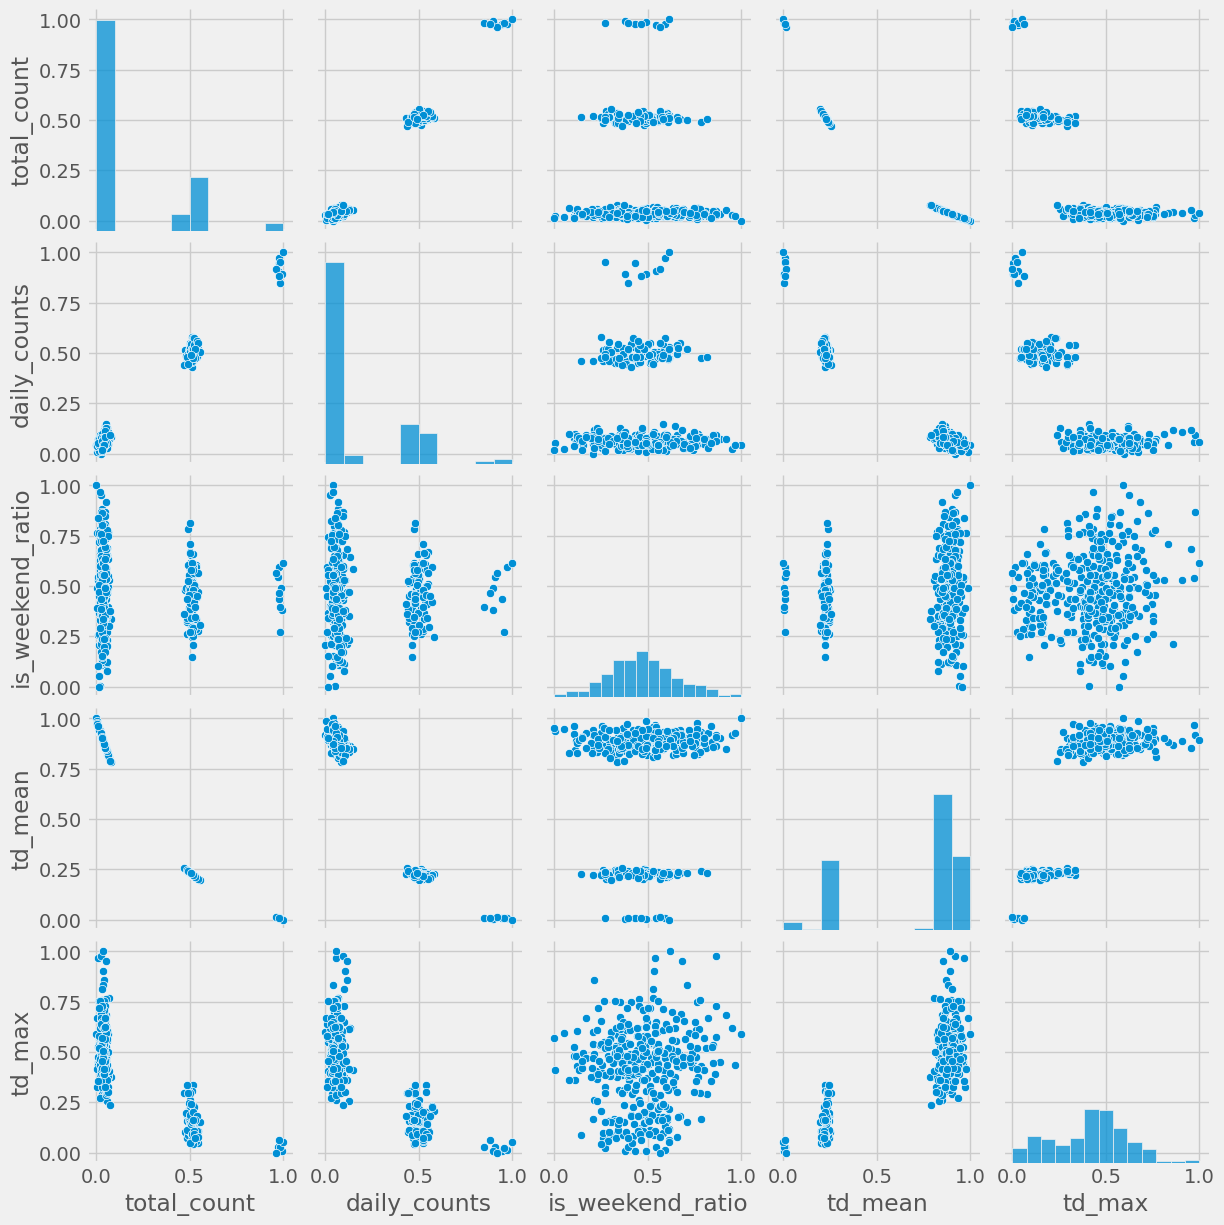

In [57]:
sns.pairplot(new_data)

In [58]:
cluster_num = range(1,15)

In [59]:
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(new_data) for i in cluster_num]

In [60]:
kmeans

[KMeans(n_clusters=1, random_state=30),
 KMeans(n_clusters=2, random_state=30),
 KMeans(n_clusters=3, random_state=30),
 KMeans(n_clusters=4, random_state=30),
 KMeans(n_clusters=5, random_state=30),
 KMeans(n_clusters=6, random_state=30),
 KMeans(n_clusters=7, random_state=30),
 KMeans(random_state=30),
 KMeans(n_clusters=9, random_state=30),
 KMeans(n_clusters=10, random_state=30),
 KMeans(n_clusters=11, random_state=30),
 KMeans(n_clusters=12, random_state=30),
 KMeans(n_clusters=13, random_state=30),
 KMeans(n_clusters=14, random_state=30)]

In [61]:
scores = [kmeans[i].score(new_data) for i in range(len(kmeans))]

In [62]:
scores

[-105.61717382018342,
 -22.662497940589923,
 -18.425259145173772,
 -11.34116401117781,
 -9.624264656308904,
 -7.6834491165191485,
 -6.605626776063946,
 -5.773343216208603,
 -5.2669670163554665,
 -4.731542252194097,
 -4.483092839218669,
 -4.1109723094544375,
 -3.9656970956213393,
 -3.803909950255066]

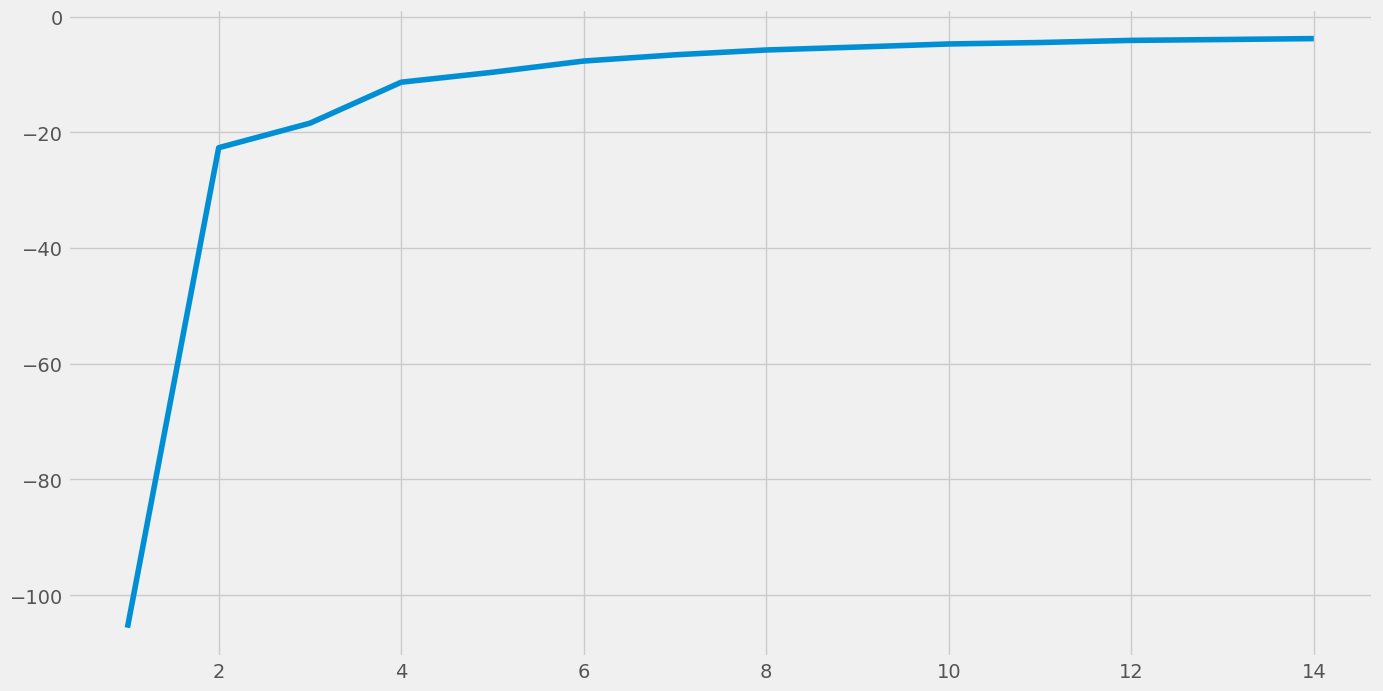

In [63]:
fig, sd = plt.subplots()
sd.plot(cluster_num,scores)
plt.show()

Displays the graph between no of clusters taken (i.e., 15) and scores calculate using kmeans

In [64]:
kmeans_cluster_model=kmeans[5]

In [65]:
kmeans_cluster_model

KMeans(n_clusters=6, random_state=30)

In [66]:
final_dataset['cluster'] = kmeans_cluster_model.predict(new_data)
final_dataset['cluster'].value_counts()

,count
cluster,
4,99
2,94
3,73
0,60
5,50
1,10


# Clustering model with TSNE

t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [67]:
from sklearn.manifold import TSNE

In [68]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)

In [69]:
tsne_result = tsne.fit_transform(new_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 386 samples in 0.003s...
[t-SNE] Computed neighbors for 386 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 0.081652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.038315
[t-SNE] KL divergence after 300 iterations: 0.375644


In [70]:
tsne_result

array([[  7.5516505 ,  -1.8475966 ],
       [-10.225705  ,   3.391964  ],
       [  1.2972114 ,  -0.71510386],
       [ -0.46138164,  -9.297569  ],
       [ -0.4155114 ,  -5.7562766 ],
       [ -0.5469004 ,  -3.0171854 ],
       [ -0.5501037 ,  -8.547561  ],
       [  7.765187  ,   6.006567  ],
       [ -0.15269239,  -1.8949823 ],
       [ -3.8881352 ,  -9.977213  ],
       [  3.4908392 ,  -5.704336  ],
       [ -1.0357306 ,  -6.9751925 ],
       [  1.1646099 ,   1.7552608 ],
       [  8.432264  ,   6.2101417 ],
       [ -1.4891664 ,  -9.2100115 ],
       [ -7.519641  ,  -1.3749399 ],
       [ -0.76689535,  -2.0927768 ],
       [  7.1565075 ,   5.0961294 ],
       [ -8.274764  ,   5.093319  ],
       [  0.87136555,  -2.0926366 ],
       [ -7.826874  ,   3.5390432 ],
       [  3.791072  ,   6.8412786 ],
       [ -9.575649  ,   3.1339493 ],
       [  8.120027  ,  -0.70197636],
       [  3.0600898 ,   2.448223  ],
       [ -8.662781  ,   5.5448275 ],
       [ -2.0453768 ,  -3.1752026 ],
 

In [71]:
final_dataset['tsne-2d-one'] = tsne_result[:,0]
final_dataset['tsne-2d-two'] = tsne_result[:,1]

In [72]:
tsne_cluster = final_dataset.groupby('cluster').agg({'tsne-2d-one':'mean','tsne-2d-two':'mean'}).reset_index()

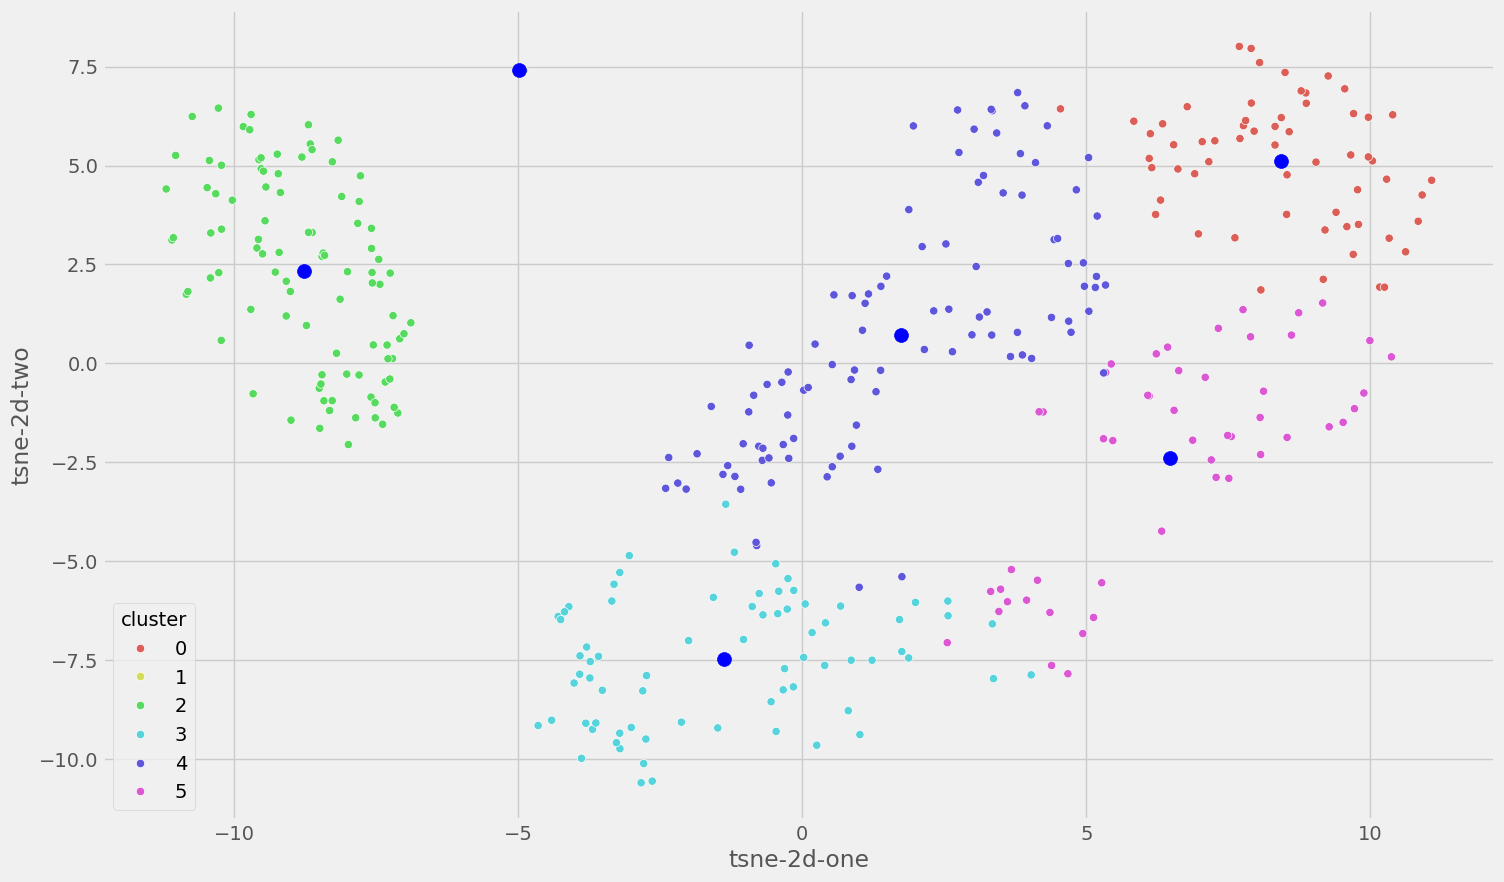

In [73]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 6),
    data=final_dataset,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [74]:
centers = kmeans_cluster_model.cluster_centers_

In [75]:
pts = np.asarray(new_data)

In [76]:
pts

array([[0.03813281, 0.05263158, 0.51209855, 0.88495446, 0.71662125],
       [0.50295858, 0.49707602, 0.51626613, 0.23136629, 0.23433243],
       [0.0443787 , 0.05263158, 0.49222476, 0.86347879, 0.30517711],
       ...,
       [0.51742275, 0.47368421, 0.57788924, 0.22188316, 0.16348774],
       [0.50558843, 0.49122807, 0.57870081, 0.2304837 , 0.24250681],
       [0.03057199, 0.01754386, 0.14970523, 0.90324786, 0.45776567]])

In [77]:
total_dist = pd.Series()

In [89]:
import numpy as np
import pandas as pd

def get_sum_square_distance(data, kmeans_cluster_model, requi_feature_cols):
    # Get cluster centers from the k-means model
    centers = kmeans_cluster_model.cluster_centers_

    # Convert the data to a numpy array of the required feature columns
    pts = np.asarray(data[requi_feature_cols])

    # Initialize total_dist as an empty Series of the same length as pts
    total_dist = pd.Series(np.zeros(len(pts)))

    # Loop over each point and compute its sum of squared distances to each cluster center
    for i in range(len(pts)):
        dist = 0
        for j in range(len(centers)):
            a = np.linalg.norm(pts[i] - centers[j])  # Euclidean distance
            dist += a**2  # Square the distance and add it to the total
        total_dist.iloc[i] = dist  # Use iloc to set the value at index i

    return total_dist

In [92]:
# Example assuming `new_data`, `kmeans_cluster_model`, and `requi_feature_cols` are defined
sum_square_distances = get_sum_square_distance(new_data, kmeans_cluster_model, requi_feature_cols)

# Check that the length of the result matches the number of rows in `final_dataset`
if len(sum_square_distances) == len(final_dataset):
    final_dataset['sum_squa_dist'] = sum_square_distances
else:
    print("Error: The length of the result does not match the number of rows in final_dataset.")

(array([ 6.,  7., 18., 23., 25., 44., 26., 23., 17., 20., 11., 21., 17.,
        25., 14., 15., 14., 11.,  7., 10.,  4.,  4.,  4.,  2.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  1.,  2.,  0.,
         1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.]),
 array([ 3.39616405,  3.48347384,  3.57078364,  3.65809343,  3.74540322,
         3.83271302,  3.92002281,  4.0073326 ,  4.09464239,  4.18195219,
         4.26926198,  4.35657177,  4.44388157,  4.53119136,  4.61850115,
         4.70581095,  4.79312074,  4.88043053,  4.96774032,  5.05505012,
         5.14235991,  5.2296697 ,  5.3169795 ,  5.40428929,  5.49159908,
         5.57890887,  5.66621867,  5.75352846,  5.84083825,  5.928148

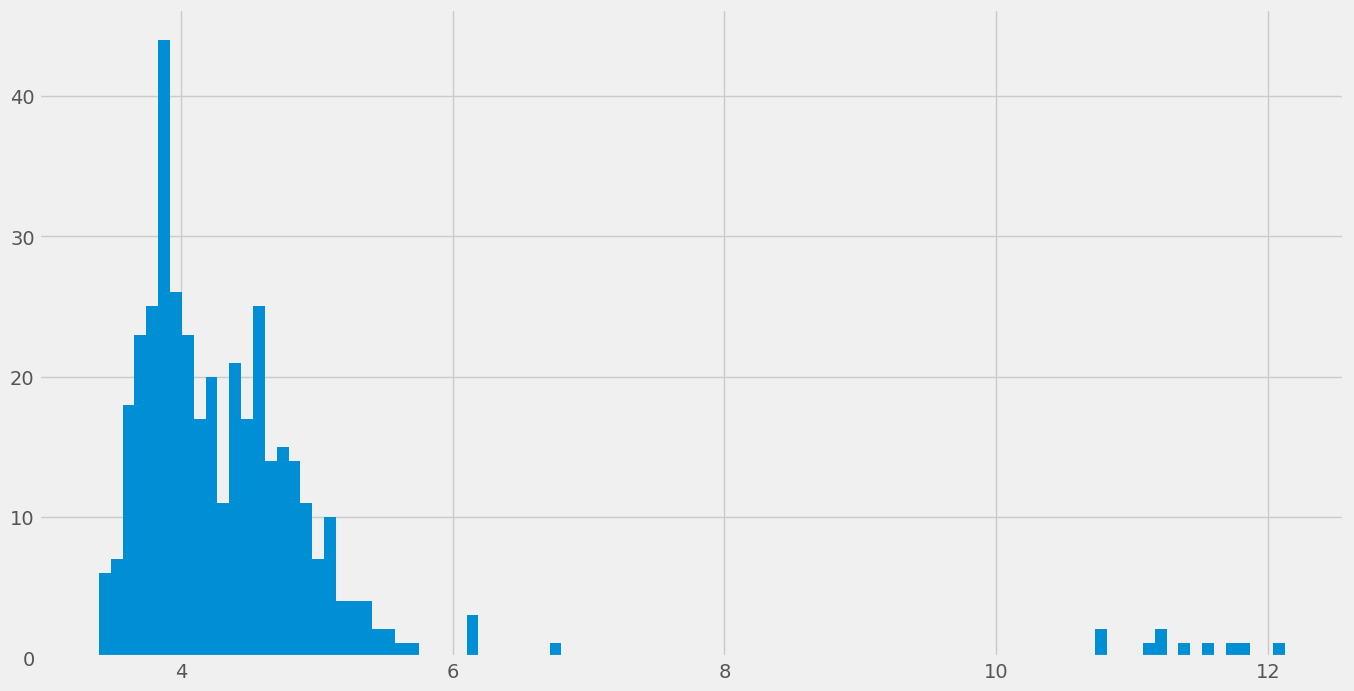

In [93]:
plt.hist(final_dataset['sum_squa_dist'], bins=100)

In [97]:
cutoff = 6

In [98]:
final_dataset['anomaly_kmeans'] = (final_dataset['sum_squa_dist'] >= cutoff).astype(int)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

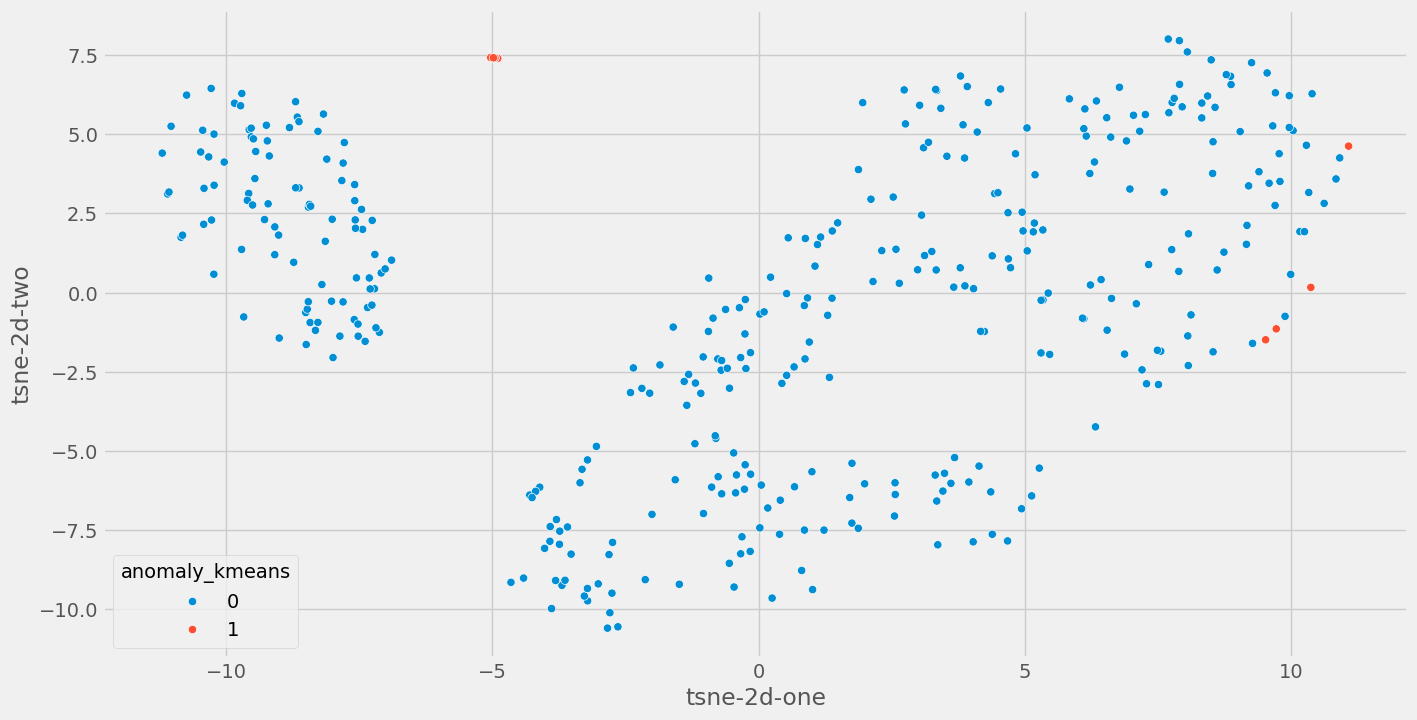

In [99]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [100]:
final_dataset.loc[final_dataset['anomaly_kmeans']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_square_dist,sum_squa_dist,anomaly_kmeans
42,10.1.1.199,1365,40.5,6.260638,30.801320,455.0,5,9.521205,-1.489080,6.132820,6.132820,1
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,1,-4.972100,7.415359,11.536764,11.536764,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,1,-5.023289,7.423323,11.746609,11.746609,1
163,10.1.1.483,1330,39.0,7.364780,31.564334,316.0,0,11.079265,4.627344,6.141373,6.141373,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,1,-4.898844,7.399555,11.819613,11.819613,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,1,-4.985723,7.416955,11.251859,11.251859,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,1,-5.005647,7.420170,11.096376,11.096376,1
255,10.1.2.249,4353,112.0,5.876777,9.332721,102.0,1,-4.949266,7.410826,11.356003,11.356003,1
286,10.1.2.323,1408,43.5,7.045714,29.719261,458.0,5,10.370402,0.166053,6.742907,6.742907,1
311,10.1.2.386,4326,108.0,5.910543,9.392370,110.0,1,-4.950544,7.410254,10.814194,10.814194,1


# Isolated Forest

In [101]:
from sklearn.ensemble import IsolationForest

In [102]:
outlier_frac = 0.028

In [103]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max', 'cluster', 'tsne-2d-one', 'tsne-2d-two',
       'sum_square_dist', 'sum_squa_dist', 'anomaly_kmeans'],
      dtype='object')

In [104]:
new_data.head()

,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,0.038133,0.052632,0.512099,0.884954,0.716621
1,0.502959,0.497076,0.516266,0.231366,0.234332
2,0.044379,0.052632,0.492225,0.863479,0.305177
3,0.025641,0.000000,0.205662,0.919573,0.599455
4,0.042406,0.081871,0.342074,0.872065,0.487738


In [105]:
iso_model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=RANDOM_STATE, contamination=outlier_frac)

In [106]:
iso_model.fit(new_data)

IsolationForest(contamination=0.028, max_features=3, n_estimators=200,
                n_jobs=-1, random_state=30)

In [107]:
final_dataset['anomaly_isolated'] = pd.Series(iso_model.predict(new_data))

In [108]:
final_dataset['anomaly_isolated'] = final_dataset['anomaly_isolated'].map( {1: 0, -1: 1} )

In [109]:
final_dataset['anomaly_isolated'].value_counts()

,count
anomaly_isolated,
0,375
1,11


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

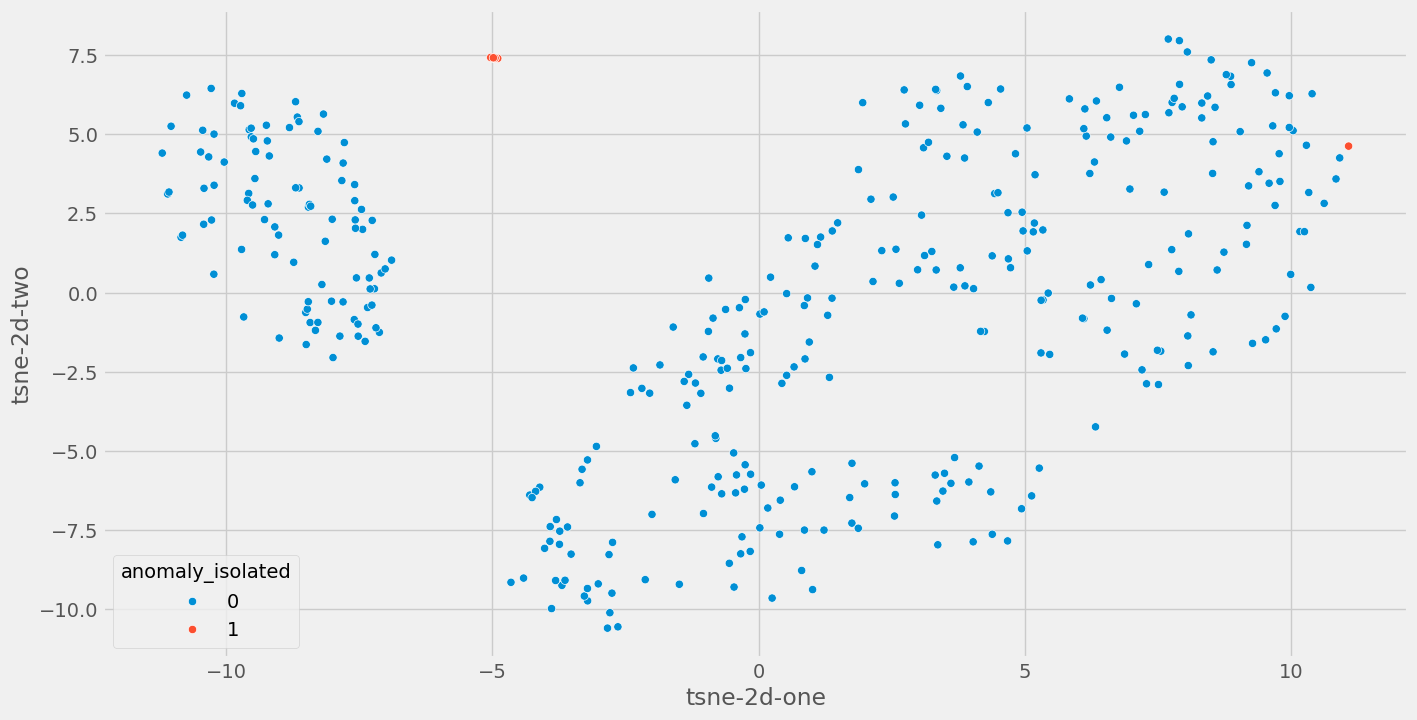

In [110]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [111]:
final_dataset.loc[final_dataset['anomaly_isolated']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_square_dist,sum_squa_dist,anomaly_kmeans,anomaly_isolated
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,1,-4.972100,7.415359,11.536764,11.536764,1,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,1,-5.023289,7.423323,11.746609,11.746609,1,1
163,10.1.1.483,1330,39.0,7.364780,31.564334,316.0,0,11.079265,4.627344,6.141373,6.141373,1,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,1,-4.898844,7.399555,11.819613,11.819613,1,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,1,-4.985723,7.416955,11.251859,11.251859,1,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,1,-5.005647,7.420170,11.096376,11.096376,1,1
255,10.1.2.249,4353,112.0,5.876777,9.332721,102.0,1,-4.949266,7.410826,11.356003,11.356003,1,1
311,10.1.2.386,4326,108.0,5.910543,9.392370,110.0,1,-4.950544,7.410254,10.814194,10.814194,1,1
357,10.1.2.486,4251,114.0,6.316695,9.571059,99.0,1,-5.004438,7.418109,11.179807,11.179807,1,1
370,10.1.2.63,4372,121.0,6.435374,9.268588,118.0,1,-5.031483,7.426332,12.127143,12.127143,1,1


# One Class SVM

In [112]:
from sklearn.svm import OneClassSVM

In [113]:
svm_model =  OneClassSVM(nu=outlier_frac, degree=2, kernel='rbf')

In [114]:
new_data_clean = new_data.loc[new_data.total_count <=new_data.total_count.quantile(1-outlier_frac)]

In [115]:
svm_model.fit(new_data_clean)

OneClassSVM(degree=2, nu=0.028)

In [116]:
final_dataset['anomaly_svm'] = pd.Series(svm_model.predict(new_data))

In [117]:
final_dataset['anomaly_svm'] = final_dataset['anomaly_svm'].map( {1: 0, -1: 1} )

In [118]:
final_dataset['anomaly_svm'].value_counts()

,count
anomaly_svm,
0,367
1,19


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

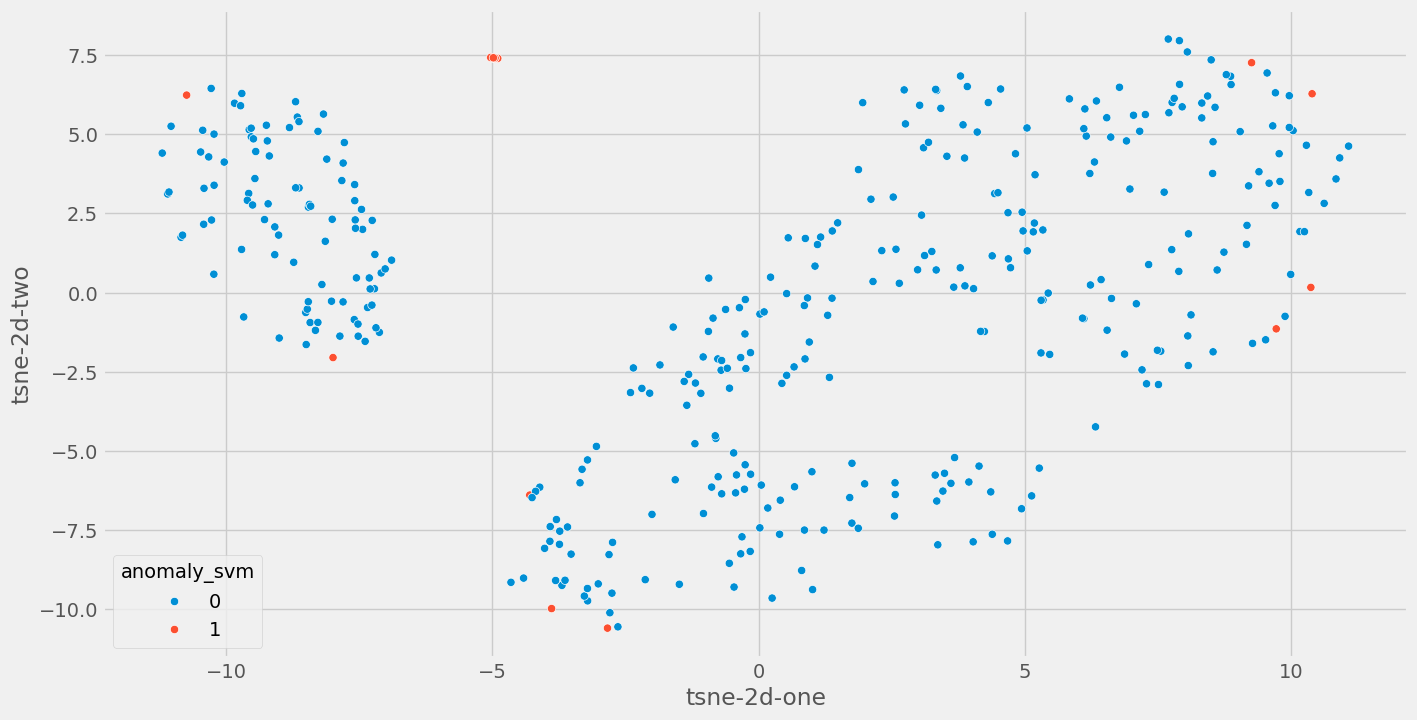

In [119]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_svm",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [120]:
final_dataset.loc[final_dataset['anomaly_svm']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_square_dist,sum_squa_dist,anomaly_kmeans,anomaly_isolated,anomaly_svm
9,10.1.1.12,1392,40.0,4.974249,30.152408,250.0,3,-3.888135,-9.977213,5.321517,5.321517,0,0,1
37,10.1.1.186,1372,37.0,4.965217,30.557987,308.0,3,-2.838034,-10.594885,5.735236,5.735236,0,0,1
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,1,-4.972100,7.415359,11.536764,11.536764,1,1,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,1,-5.023289,7.423323,11.746609,11.746609,1,1,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,1,-4.898844,7.399555,11.819613,11.819613,1,1,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,1,-4.985723,7.416955,11.251859,11.251859,1,1,1
183,10.1.1.73,1484,40.5,5.480349,28.191504,195.0,3,-4.298039,-6.392991,4.080323,4.080323,0,0,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,1,-5.005647,7.420170,11.096376,11.096376,1,1,1
225,10.1.2.178,1400,39.0,7.284024,29.964975,258.0,0,10.393672,6.281297,5.337704,5.337704,0,0,1
233,10.1.2.195,2859,76.5,6.919668,14.448915,206.0,2,-10.741546,6.238132,4.898477,4.898477,0,0,1


# Performance of the Algorithm

We must manually categorise the data and examine the performance of the individual algos because it is unsupervised.

In [121]:
total_counts_condition = (final_dataset['total_count'] >= final_dataset['total_count'].quantile(0.90))
daily_counts_condition =  (final_dataset['daily_counts'] >= final_dataset['daily_counts'].quantile(0.90))

In [123]:
final_dataset['anomaly_manual'] = (total_counts_condition | daily_counts_condition).astype(int)

In [124]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_square_dist,sum_squa_dist,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0,5,7.551651,-1.847597,4.373527,4.373527,0,0,0,0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0,2,-10.225705,3.391964,4.382788,4.382788,0,0,0,0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0,4,1.297211,-0.715104,3.665171,3.665171,0,0,0,0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0,3,-0.461382,-9.297569,4.756890,4.756890,0,0,0,0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0,3,-0.415511,-5.756277,3.767847,3.767847,0,0,0,0


In [125]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [126]:
def get_sensitivity_specificity(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sensitivity = cf[0,0]/(cf[:,0].sum())
    specificity = cf[1,1]/(cf[:,1].sum())
    return sensitivity, specificity

In [127]:
f1_iso = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
acc_iso = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
roc_iso = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
met_iso = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
          }

In [128]:
f1_kmeans = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
acc_kmeans = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
roc_kmeans = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
sen_kmeans, spec_kmeans = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
met_kmeans = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans,
           'specificity': spec_kmeans
          }

In [129]:
f1_svm = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
acc_svm = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
roc_svm = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
sen_svm, spec_svm = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
met_svm = {
           'f1_score': f1_svm,
           'accuracy': acc_svm,
           'roc_score': roc_svm,
           'sensitivity': sen_svm,
           'specificity': spec_svm
          }

In [130]:
metrics = {'isolated_forest': met_iso,
           'kmeans': met_kmeans,
           'svm': met_svm
          }

In [131]:
all_metrics = pd.DataFrame.from_dict(metrics)

In [132]:
all_metrics

,isolated_forest,kmeans,svm
f1_score,0.303030,0.289855,0.270270
accuracy,0.880829,0.873057,0.860104
roc_score,0.589399,0.584867,0.577314
sensitivity,0.880000,0.879032,0.877384
specificity,0.909091,0.714286,0.526316


# Ensemble models for Classification

In [133]:
from sklearn.preprocessing import LabelEncoder
final_dataset['ip_address'] = LabelEncoder().fit_transform(final_dataset.iloc[:, -1])

In [134]:
features = ['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']
X = final_dataset[features]
y = final_dataset['anomaly_isolated']

In [135]:
X, y = final_dataset[features], final_dataset['anomaly_isolated']
X.shape, y.shape

((386, 6), (386,))

## Baseline Classifier

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

rf = OneVsRestClassifier(estimator = GaussianNB())

# Create RepeatedStratifiedKFold cross-validator with 10 folds, 3 repeats and a seed of 1.
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

# Calculating accuracy using `cross_val_score()` with model instantiated, data to fit,
# target variable, 'accuracy' scoring, cross validator, n_jobs=-1, and error_score set to 'raise'
n_scores = cross_val_score(rf, X, y, scoring='f1_weighted', cv=cv, error_score='raise')

# Print mean and standard deviation of n_scores:
print(n_scores)
print('Baseline scores \n mean f1 weighted: %.3f with a %.3f standard deviation in scores ' % (np.mean(n_scores), np.std(n_scores)))

[0.91306815 0.92877493 0.86485671 0.94457323 0.96084546 0.95655271
 0.96070175 0.91064618 0.91064618 0.87780396 0.92877493 0.83100233
 0.94457323 0.91306815 0.92877493 0.95655271 0.94306894 0.87780396
 0.94306894 0.96070175 0.96084546 0.91306815 0.91306815 0.89725275
 0.91306815 0.86824618 0.89434985 1.         0.94306894 0.96070175]
Baseline scores 
 mean f1 weighted: 0.924 with a 0.036 standard deviation in scores 


## Stacking Classifier

Stacking classifier takes:
1. estimators: List of baseline classifiers

2. final_estimator: Defined meta classifier

3. cv: Number of cross validations to perform

In [137]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                                     , weights = 'distance')
                       ))
    base_models.append(('SVC', SVC(kernel = 'linear'
                                   , class_weight = 'balanced'
                                  , break_ties = True)
                       ))
    base_models.append(('GNB', GaussianNB()))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 200,
                                                   oob_score = True,
                                                   class_weight = "balanced",
                                                   random_state = 20,
                                                   ccp_alpha = 0.1)
                       ))


    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

def models_all():
    all_models = dict()
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                             , weights = 'distance')
    all_models['SVC']= SVC(kernel = 'linear'
                           , class_weight = 'balanced'
                          , break_ties = True
                          )
    all_models['RF']= RandomForestClassifier(n_estimators= 200,
                                                   oob_score = True,
                                                   class_weight = "balanced",
                                                   random_state = 20,
                                                   ccp_alpha = 0.15)
    all_models['GNB'] = GaussianNB()
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [138]:
model_results = list()
models = models_all()
names = list()

# Creating a for loop that iterates over each name, model in models dictionary
for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)
#   print(model_results)
    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.994 (0.012) 

>SVC 0.996 (0.011) 

>RF 0.996 (0.011) 

>GNB 0.921 (0.035) 

>Stacking 0.996 (0.011) 



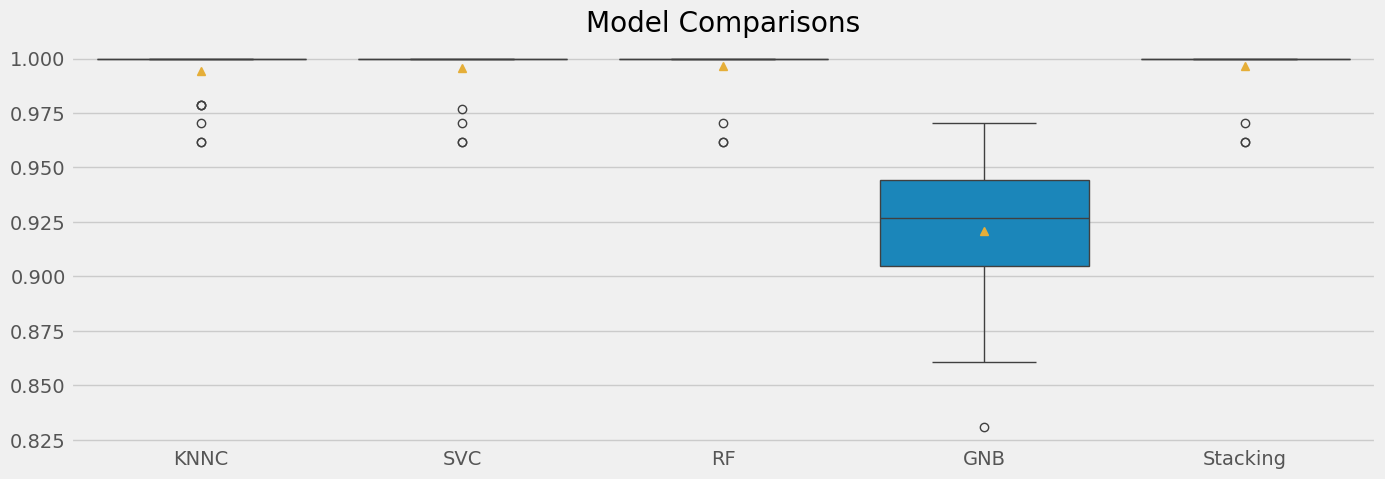

In [141]:
# Flatten the data for the boxplot
flat_names = np.repeat(names, [len(r) for r in model_results])
flat_results = np.concatenate(model_results)

# Create the boxplot with reshaped data
plt.figure(figsize=(15,5))
sns.boxplot(x=flat_names, y=flat_results, showmeans=True)
plt.title("Model Comparisons")
plt.show()

### Conclusion
- With a stacking model, we were able to get an F1 score of 96.7%, which was greater than the target of 81.1%